# NLP Basics: Learning how to use regular expressions




### Using regular expressions in Python

Python's `re` package is the most commonly used regex resource. More details can be found [here](https://docs.python.org/3/library/re.html).

In [9]:
# to load all the library auro load use these commands
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.api.types import is_string_dtype, is_numeric_dtype

import matplotlib.pyplot as plt

%matplotlib inline

from pandas.api.types import is_string_dtype, is_numeric_dtype

In [29]:
import nltk
import string
import re
stopword=nltk.corpus.stopwords.words('english')
## Stemming 

ps=nltk.PorterStemmer()
lm=nltk.WordNetLemmatizer()

In [30]:
print('lemmanize meannes:', lm.lemmatize('meanness'))
print('lemmanize meaning:', lm.lemmatize('meaning'))

print ('\n')

print('stemming meannes:', ps.stem('meanness'))
print('steming meaning:', ps.stem('meaning'))

lemmanize meannes: meanness
lemmanize meaning: meaning


stemming meannes: mean
steming meaning: mean


# Spam Classifier 

In [31]:
Emails=pd.read_csv('../Review/Resource/SMSSpamCollection.tsv', sep='\t' , header=None, names=['label','body_text'])

Emails.head()


,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [32]:
# function to clean

def cleaning(x):
    clean=''.join([char for char in x if x not in string.punctuation])
    # remove and tokenized 
    
    tokenized1= re.split('\W+', clean)
    # OR 
    #tokenized1=re.findall('[a-z]+', clean)
    
    tokenized2= [word for word in tokenized1 if word not in stopword ]
   
    clean_text=[ps.stem(word) for word in tokenized2 ]
    
    # or use lemmatizer
    #clean_text=[lm.lemmatize(word) for word in tokenized2]
    
    
    return clean_text

Emails=pd.read_csv('../Review/Resource/SMSSpamCollection.tsv', sep='\t' , header=None, names=['label','body'])


Emails['Tokenized']=Emails.body.apply(lambda x : cleaning (x.lower()))

Emails.head()

,label,body,Tokenized
0,ham,I've been searching for the right words to tha...,"[search, right, word, thank, breather, promis,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, think, goe, usf, live, around, though]"
3,ham,Even my brother is not like to speak with me. ...,"[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday, ]"


In [33]:
# better to use lem and re.findall('[a-z]',word.lower())

# function to clean

def cleaning(x):
    clean=''.join([char for char in x if x not in string.punctuation])
    # remove and tokenized 
    
    #tokenized1= re.split('\W+', clean)
    # OR 
    tokenized1=re.findall('[a-z]+', clean)
    
    tokenized2= [word for word in tokenized1 if word not in stopword ]
   
    #clean_text=[ps.stem(word) for word in tokenized2 ]
    
    # or use lemmatizer
    clean_text=[lm.lemmatize(word) for word in tokenized2]
    
    
    return clean_text

Emails=pd.read_csv('../Review/Resource/SMSSpamCollection.tsv', sep='\t' , header=None, names=['label','body'])


Emails['Tokenized']=Emails.body.apply(lambda x : cleaning (x.lower()))

Emails.head()

,label,body,Tokenized
0,ham,I've been searching for the right words to tha...,"[searching, right, word, thank, breather, prom..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,..."
2,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. ...,"[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]"


# CountVectorizer

In [34]:
# stop words also in sklern
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
stopp=ENGLISH_STOP_WORDS
stopp

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

# - analyzer is the function we use to clean , we have define clean function before

# - ngrams is combination of words

# - max_feature is max number of column and alos mean words



vectorizer=CountVectorizer(analyzer=cleaning, max_features=6000, ngram_range=(1,3))


x_vect=vectorizer.fit_transform(Emails.body)

# tokenization

How Text Tokenization Works
Tokenization is a way to split text into tokens. These tokens could be paragraphs, sentences, or individual words. NLTK provides a number of tokenizers in the tokenize module. This demo shows how 5 of them work.

The text is first tokenized into sentences using the PunktSentenceTokenizer. Then each sentence is tokenized into words using 4 different word tokenizers:

    TreebankWordTokenizer
    WordPunctTokenizer
    PunctWordTokenizer
    WhitespaceTokenizer
    
The pattern tokenizer does its own sentence and word tokenization, and is included to show how this library tokenizes text before further parsing

In [36]:
vectorizer

CountVectorizer(analyzer=<function cleaning at 0x1307d3730>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=6000, min_df=1, ngram_range=(1, 3), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

### Understanding Tfivectozer and CountVectorizer

In [37]:
# testing stopwords
test=['we are trying to show countvectorizer',
     'countvectorizer is a good method for us',
     'one good method is countvectorizer']

from sklearn.feature_extraction.text import CountVectorizer

vect=CountVectorizer(analyzer=cleaning , stop_words='english', min_df=0.3)

words=vect.fit_transform(test)

df=pd.DataFrame(words.toarray() , columns=vect.get_feature_names())
print (df.shape)
df.head()

(3, 7)


,countvectorizer,good,method,one,show,trying,u
0,1,0,0,0,1,1,0
1,1,1,1,0,0,0,1
2,1,1,1,1,0,0,0


In [38]:
df=pd.DataFrame(x_vect.toarray())
df.tail(3)

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
5565,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# add word name

df=pd.DataFrame(x_vect.toarray(), columns=vectorizer.get_feature_names())
df.head(3)

,aaaaa,aaaaaaaabe,aaaaabe,aaaat,aangalyam,aat,aathi,ab,abdomen,abe,...,yuou,z,zac,zealand,zed,zero,zhong,zoom,zyada,zzit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# applying TFID 

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

TF=TfidfVectorizer(analyzer=cleaning, max_features=600000, ngram_range=(1,3))
x_vect=TF.fit_transform(Emails.body)
TF

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


TfidfVectorizer(analyzer=<function cleaning at 0x1307d3730>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=600000, min_df=1, ngram_range=(1, 3), norm='l2',
        preprocessor=None, smooth_idf=True, stop_words=None,
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [41]:
n_df=pd.DataFrame(x_vect.toarray(), columns=TF.get_feature_names())
n_df.head(3)

,aa,aaaaa,aaaaaaaabe,aaaaabe,aaaat,aangalyam,aat,aathi,ab,abdomen,...,yuou,z,zac,zealand,zed,zero,zhong,zoom,zyada,zzit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
Emails.label=Emails.label.astype('category').cat.codes

# apply Random Forrest

In [43]:
### lets check it in a  normal way but test split
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test= train_test_split(n_df.values, Emails.label, test_size=0.2)

RFModel= RandomForestClassifier(n_estimators=100, max_features=0.5 , n_jobs=-1)


RFModel.fit(X_train, y_train)



/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [44]:
RFModel.score(X_test, y_test)

0.981149012567325

# feature enginnering  

* add more columns like count of punctuation
* count of capital word 
* % of capital word to toal len

In [45]:

# add punctuation count 

def add_count(x):
    counts=sum([1 for char in x if char in string.punctuation])
    return counts



Emails['punc']=Emails.body.apply(lambda x : add_count(x))




# add lentgh of the text

Emails['len']=Emails.body.apply(lambda x : len(x))


def capital_count(x):
    number=sum([1 for char in x if x.upper()==x])
    return number


Emails['capitals']=Emails.body.apply(lambda x : capital_count(x))



#punc %

Emails['Punc_percent']=Emails.punc / Emails.len

Emails.head()
    

,label,body,Tokenized,punc,len,capitals,Punc_percent
0,0,I've been searching for the right words to tha...,"[searching, right, word, thank, breather, prom...",4,196,0,0.020408
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,...",6,155,0,0.038710
2,0,"Nah I don't think he goes to usf, he lives aro...","[nah, think, go, usf, life, around, though]",2,61,0,0.032787
3,0,Even my brother is not like to speak with me. ...,"[even, brother, like, speak, treat, like, aid,...",2,77,0,0.025974
4,0,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]",2,35,35,0.057143


In [46]:
Text=pd.concat([Emails.iloc[:,3:],n_df], axis=1)
Text.head()

,punc,len,capitals,Punc_percent,aa,aaaaa,aaaaaaaabe,aaaaabe,aaaat,aangalyam,...,yuou,z,zac,zealand,zed,zero,zhong,zoom,zyada,zzit
0,4,196,0,0.020408,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,155,0,0.038710,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,61,0,0.032787,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,77,0,0.025974,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,35,35,0.057143,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# RandomForrest on all Features

In [47]:
### lets check it in a  normal way but test split
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test= train_test_split(Text.values, Emails.label)

RFModel= RandomForestClassifier(n_estimators=100, max_features=0.5 , n_jobs=-1)


%time RFModel.fit(X_train, y_train)



CPU times: user 8min 1s, sys: 4.8 s, total: 8min 6s
Wall time: 1min 16s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [48]:
RFModel.score(X_test, y_test)

0.9698275862068966

In [49]:
pd.DataFrame(list(zip(RFModel.feature_importances_,vectorizer.get_feature_names()))).sort_values(by=0,ascending=False).head(10)

,0,1
1,0.230406,aaaaaaaabe
4712,0.117234,ssex
963,0.059423,caller
3983,0.054525,registration
5713,0.024356,website
4701,0.022080,spring
1172,0.019914,continue
4321,0.014465,secretary
3930,0.013341,recd
5066,0.010658,thesis


# Naive Bayes

In [50]:
from sklearn.naive_bayes import MultinomialNB

nb=MultinomialNB()

nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [51]:
nb.score(X_test, y_test)

0.9137931034482759

In [52]:
from sklearn.model_selection import KFold, cross_val_score

cross= cross_val_score(nb ,Text.values, Emails.label, cv=10 , n_jobs=-1 , scoring='accuracy')
cross

array([0.94086022, 0.94265233, 0.93357271, 0.92459605, 0.93357271,
       0.93357271, 0.93345324, 0.93165468, 0.92985612, 0.94244604])

In [53]:
cross.mean()



0.9346236799869192

# like feature importantce and get feature name find the number of word sin each spam and Ham

In [54]:
X=Emails.body
y=Emails.label


N_TF=TfidfVectorizer(analyzer=cleaning , max_features=200000, ngram_range=(1,3))
vect=N_TF.fit_transform(Emails.body)



from sklearn.naive_bayes import MultinomialNB

NB=MultinomialNB()

NB.fit(vect,y)



a=NB.feature_count_[0,:] # 1 for ham
b=NB.feature_count_[1,:] # for spam
WORDS=pd.DataFrame({'words':N_TF.get_feature_names(),'ham':a, 'spam':b} )


/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [55]:
# WORDS.set_index('words', inplace=True)

WORDS.sort_values(by='ham', ascending=False)[:10]

,words,ham,spam
6656,u,127.629122,10.425615
3376,k,83.541294,1.374084
1776,e,70.592278,7.922981
2544,get,65.713628,7.452450
959,call,64.712683,35.599725
2661,gt,63.718139,0.000000
3724,lt,63.581678,0.000000
1245,come,59.318385,0.706442
2750,hat,55.529448,3.294042
3445,know,53.151170,4.726871


In [56]:
WORDS.sort_values(by='spam', ascending=False)[:10]

,words,ham,spam
959,call,64.712683,35.599725
4708,p,1.019770,32.463542
3979,mobile,3.019909,21.732005
5062,prize,0.000000,20.923566
7231,www,0.562617,19.354877
1168,claim,0.000000,19.200897
7251,xt,0.949948,17.854472
6644,txt,2.079967,17.640923
6372,text,21.178617,17.499530
6808,ur,39.416110,17.426170


In [57]:
pr=nb.predict(Text.values)
pr

array([0, 1, 0, ..., 0, 0, 0], dtype=int8)

# get the wrong prediction


In [58]:
Emails.body[Emails.label>pr]

9       SIX chances to win CASH! From 100 to 20,000 po...
10      URGENT! You have won a 1 week FREE membership ...
11      XXXMobileMovieClub: To use your credit, click ...
15      England v Macedonia - dont miss the goals/team...
30      Thanks for your subscription to Ringtone UK yo...
38      07732584351 - Rodger Burns - MSG = We tried to...
50      SMS. ac Sptv: The New Jersey Devils and the De...
52      Congrats! 1 year special cinema pass for 2 is ...
63      Urgent UR awarded a complimentary trip to Euro...
64      Did you hear about the new "Divorce Barbie"? I...
91      Your free ringtone is waiting to be collected....
113     You are a winner U have been specially selecte...
131     Want 2 get laid tonight? Want real Dogging loc...
135     You'll not rcv any more msgs from the chat svc...
143     FreeMsg Why haven't you replied to my text? I'...
155     Customer service annoncement. You have a New Y...
160     -PLS STOP bootydelious (32/F) is inviting you ...
161     BangBa

# GridSearch Method to find the best parameters

In [59]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier()

params={'n_estimators':[100,150],'max_features':[0.5],'max_depth':[90,None] }

GS=GridSearchCV(RF, params, cv=5, n_jobs=-1 ,verbose=True)


In [ ]:
GS.fit(Text.values, Emails.label)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [ ]:
GS.best_estimator_

In [213]:
GS.best_score_

0.970007183908046

# Gradient Boost



In [55]:
from sklearn.ensemble import GradientBoostingClassifier

print (GradientBoostingClassifier())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)


In [70]:
# just like random forrest

# we also can write this function instead of grid search

def best_model(estimator, lr, max_depth):
    
    GB=GradientBoostingClassifier(n_estimators=est, max_depth=max_depth, learning_rate=lr)
    
    GB.fit(Text.values, Emails.label)
    
    score=GB.score(Text.values, Emails.label)
    
    return print('Score: ', score ,'estimator:',estimator, 'l_rate:',lr, 'max_depth:',max_depth)
    
    
        



In [71]:


for est in range(150,50):
    for lr in [0.1 ,5,10]:
        for max_depth in [10,2]:
            best_model(est,lr,max_depth)

In [89]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.pipeline import make_pipeline




from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test= train_test_split(Emails.body, Emails.label)


print (X_train.shape , y_train.shape , X_test.shape , y_test.shape)
model=make_pipeline(TfidfVectorizer( analyzer=cleaning ,max_features=200000, ngram_range=(1,3),stop_words='english'),MultinomialNB())

model.fit(X_train,y_train)


(4176,) (4176,) (1392,) (1392,)


/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(analyzer=<function cleaning at 0x10d619bf8>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=200000, min_df=1, ngram_range=(1, 3), norm='l2...   vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [90]:
model.score(X_test,y_test)

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


0.9647988505747126

In [91]:
from sklearn.metrics import confusion_matrix

predict=model.predict(X_test)
con=confusion_matrix(y_test, predict)
print (con)

[[1209    0]
 [  49  134]]


In [93]:
# find where model calculated as spam when it was ham   ham=0 and spam=1  so ham<spam but predict=1 and y=0


X_test[predict<y_test]

1871    Would you like to see my XXX pics they are so ...
875     U have a secret admirer who is looking 2 make ...
231     Text & meet someone sexy today. U can find a d...
4100    U have a secret admirer who is looking 2 make ...
1876    U have a secret admirer who is looking 2 make ...
5423    Santa Calling! Would your little ones like a c...
4748    Your weekly Cool-Mob tones are ready to downlo...
1936    More people are dogging in your area now. Call...
785     5 Free Top Polyphonic Tones call 087018728737,...
3497    Dorothy@kiefer.com (Bank of Granite issues Str...
877     Reminder: You have not downloaded the content ...
4196    cmon babe, make me horny, *turn* me on! Txt me...
50      SMS. ac Sptv: The New Jersey Devils and the De...
2911    Sorry! U can not unsubscribe yet. THE MOB offe...
161     BangBabes Ur order is on the way. U SHOULD rec...
1959    it to 80488. Your 500 free text messages are v...
2260    Not heard from U4 a while. Call 4 rude chat pr...
260     Hey I 

In [94]:
# /3 let chcek count vectorizer


from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.pipeline import make_pipeline




from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test= train_test_split(Emails.body, Emails.label)


print (X_train.shape , y_train.shape , X_test.shape , y_test.shape)
model=make_pipeline(CountVectorizer( analyzer=cleaning ,max_features=200000, ngram_range=(1,3),stop_words='english'),MultinomialNB())

model.fit(X_train,y_train)
model.score(X_test,y_test)

(4176,) (4176,) (1392,) (1392,)


0.9841954022988506

# gridinet Boosting 

In [ ]:

def train_GB(est,depth,lr):
    GB=GradientBoostingClassifier(n_estimators=est, learning_rate=lr, max_depth=depth)
    GB.fit(Text.values, Emails.label)
    score=GB.score(Text.values, Emails.label)
    
    print ('results :', est, depth ,lr , f'score{score}')
    
for est in [50,150]:
    for depth in [3,11]:
        for lr in [0.01, 0.1 ,  1]:
            train_GB(est,depth,lr)

# ==================================================


# First Example (yelp)

In [33]:

yelp =pd.read_csv('../Resource/yelp.csv')
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [219]:
yelp.stars.value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

In [111]:
X=yelp.iloc[:,4]
y=yelp.iloc[:,[3]]
X.shape

(10000,)

((9000, 1), (1000, 1), (9000, 1))

In [61]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB


model =make_pipeline(TfidfVectorizer(analyzer=cleaning ,max_features=200000, 
                ngram_range=(1,3),stop_words='english'), MultinomialNB())


model.fit(yelp.text,yelp.stars)

#pipline.score(yelp.text,yelp.stars)

from sklearn.model_selection import cross_val_score

cross= cross_val_score(model,yelp.text,yelp.stars, cv=10 )

cross

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

array([0.43213573, 0.43056943, 0.42157842, 0.42457542, 0.44655345,
       0.44555445, 0.425     , 0.43587174, 0.43386774, 0.44734203])

In [84]:
# naive Bayse

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer , TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

Model = Pipeline([('TF',TfidfVectorizer()),('Tf',TfidfTransformer()), ('NB', MultinomialNB())])


params ={'TF__ngram_range':[(1,1),(1,2),(1,3)],
        'TF__max_features':[50000,25000], 'TF__min_df':[0.1,0.05]}


GS=GridSearchCV(Model , params, cv=5 , n_jobs=-1 ,verbose=True)

GS.fit(yelp.text,yelp.stars)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('TF', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
    ...linear_tf=False, use_idf=True)), ('NB', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'TF__ngram_range': [(1, 1), (1, 2), (1, 3)], 'TF__max_features': [50000, 25000], 'TF__min_df': [0.1, 0.05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)

In [85]:
GS.best_score_

0.4598

In [86]:
GS.best_params_

{'TF__max_features': 50000, 'TF__min_df': 0.05, 'TF__ngram_range': (1, 3)}

In [88]:
from sklearn.metrics import confusion_matrix

pre=GS.predict(yelp.text)

confusion = confusion_matrix(yelp.stars,pre)

confusion 

array([[ 105,    5,    0,  430,  209],
       [  44,   13,   13,  719,  138],
       [  13,    5,   24, 1227,  192],
       [   1,    1,    2, 2611,  911],
       [   5,    0,    0, 1314, 2018]])

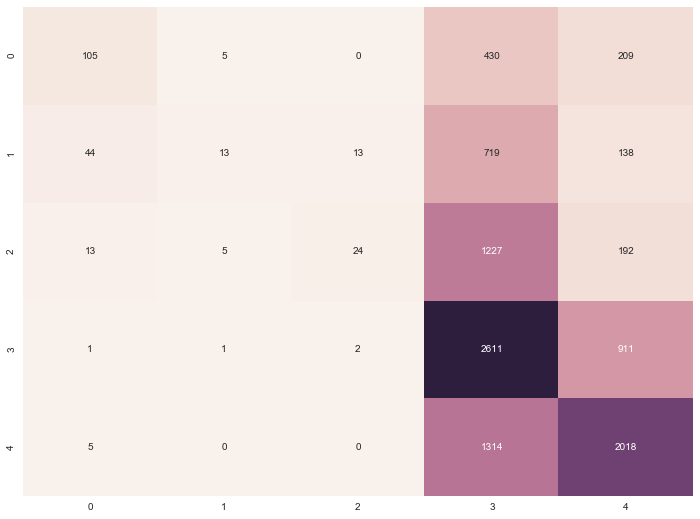

In [95]:

plt.figure(figsize=(12,9))
sns.heatmap(confusion, annot=True , cbar=False ,fmt='d')

In [102]:
# check with random Forrest


# naive Bayse

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer , TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Model = Pipeline([('TF',TfidfVectorizer()),('Tf',TfidfTransformer()), ('RF', RandomForestClassifier())])


params ={'TF__analyzer':[cleaning],
    'TF__ngram_range':[(1,1),(1,2),(1,3)],
        'TF__max_features':[50000,25000], 'TF__min_df':[0.1,0.05]
        ,'RF__n_estimators':[50,150], 'RF__max_depth':[10,40], 
         'RF__max_features':[0.5 , 10],'RF__min_samples_split':[2,5] }


GS=GridSearchCV(Model , params, cv=3 , n_jobs=-1 ,verbose=True)

GS.fit(yelp.text,yelp.stars)



Fitting 3 folds for each of 192 candidates, totalling 576 fits


/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.0min
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubd

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('TF', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
    ...imators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'TF__analyzer': [<function cleaning at 0x10aa39510>], 'TF__ngram_range': [(1, 1), (1, 2), (1, 3)], 'TF__max_features': [50000, 25000], 'TF__min_df': [0.1, 0.05], 'RF__n_estimators': [50, 150], 'RF__max_depth': [10, 40], 'RF__max_features': [0.5, 10], 'RF__min_samples_split': [2, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)

In [103]:
GS.best_score_

0.4447

In [104]:
GS.best_params_

{'RF__max_depth': 40,
 'RF__max_features': 10,
 'RF__min_samples_split': 2,
 'RF__n_estimators': 150,
 'TF__analyzer': <function __main__.cleaning(x)>,
 'TF__max_features': 50000,
 'TF__min_df': 0.05,
 'TF__ngram_range': (1, 1)}

### now we have the params we put it inside a new model

# =================================================================

In [195]:

from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test= train_test_split(X,y, test_size=0.1)
X_train.shape , X_test.shape, y_train.shape

((9000,), (1000,), (9000, 1))

In [223]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB


vect=TfidfVectorizer(analyzer=cleaning ,max_features=50000, min_df=0.05 , ngram_range=(1,3))

v_X_train=vect.fit_transform(X_train)

v_X_test=vect.transform(X_test)


NB=MultinomialNB()

NB.fit(v_X_train, y_train)
NB.score(v_X_test, y_test)

0.472

In [198]:

word={'zero':NB.feature_count_[0,:] ,'one':NB.feature_count_[1,:],
                    'two':NB.feature_count_[2,:], 'three':NB.feature_count_[3,:],
                    'four':NB.feature_count_[4,:]}

WORDS=pd.DataFrame(word, index=vect.get_feature_names())
WORDS.head(1)

,zero,one,two,three,four
actually,11.384624,16.047911,17.969132,34.181445,26.985191


In [199]:
WORDS.sort_values(by='four', ascending=False).head(15)

,zero,one,two,three,four
place,46.569933,60.676195,99.375849,242.062144,218.608014
great,7.754690,25.026293,52.543797,203.601546,201.494405
food,51.288984,69.046442,89.452914,206.904349,178.486680
good,22.853845,53.857270,106.342031,256.937608,159.189462
e,35.450803,40.053045,54.407181,146.066903,155.331062
time,35.752092,42.097500,66.417704,151.444091,149.656428
love,7.115739,10.808116,28.563597,95.496651,149.432927
best,9.083364,13.781557,22.030534,73.767633,135.356056
one,34.643225,41.439767,58.775486,130.924667,126.497285
get,34.417282,42.317300,63.042678,142.595750,124.582948


In [308]:
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

In [310]:
comment_words = ' '
stopwords = set(STOPWORDS)


for val in yelp.text:
    
    val=str(val)
    tokens = val.split()

 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    
    for words in tokens: 
        comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

KeyboardInterrupt: 

In [ ]:
   for words in vect.get_feature_names():
    words+=words

In [120]:
NB.class_count_ 

array([ 674.,  845., 1318., 3177., 2986.])

In [124]:
NB.feature_count_[:,1]

array([17.6338695 , 22.86034601, 31.93595358, 62.79342956, 65.41765797])

# ==========================================================

# wordcloud

In [ ]:
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

In [311]:
df['tockem']=df.text.map( lambda x : cleaning(x))

df.head(2)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,tockem
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,"[wife, took, birthday, breakfast, excellent, w..."
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,"[idea, people, give, bad, review, place, go, s..."


In [326]:
stopwords = set(STOPWORDS) 
bag_words=' '
for word in df.tockem:
    bag_words= bag_words + str(word) +' '




wordcloud = WordCloud(width = 1200, height = 1200, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(bag_words)


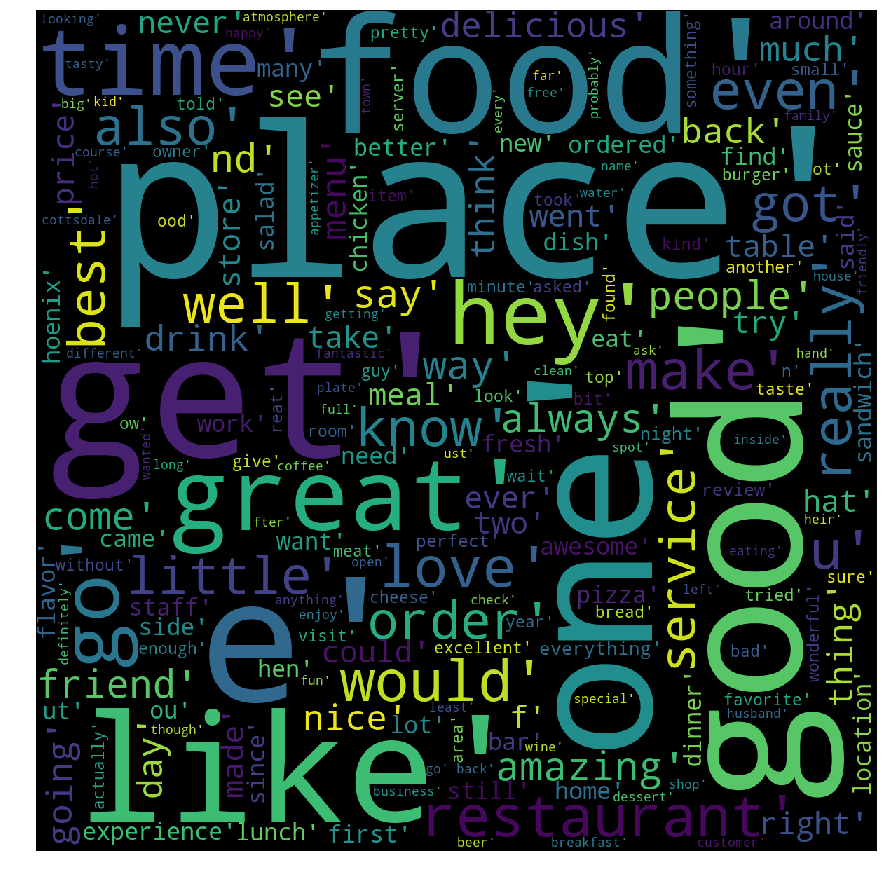

In [327]:
# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# just focusing one bad reviews

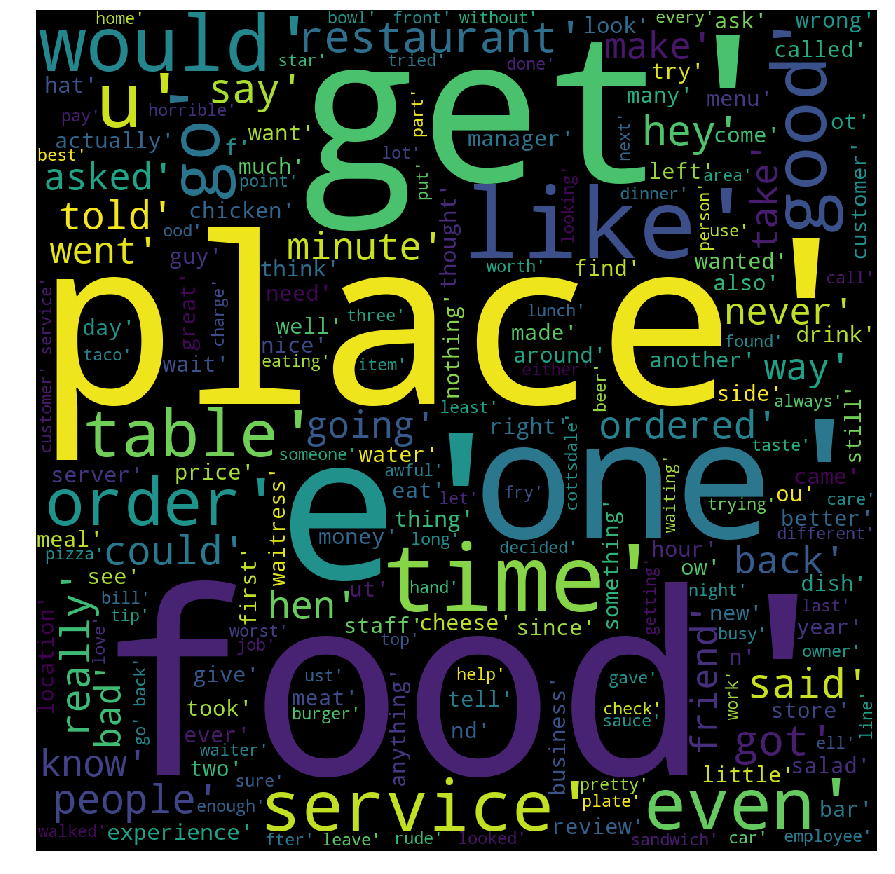

In [329]:
stopwords = set(STOPWORDS) 
bag_words=' '
# only loooking at 1 star

for word in df[df.stars==1].tockem: 
    bag_words= bag_words + str(word) +' '




wordcloud = WordCloud(width = 1200, height = 1200, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(bag_words)


# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

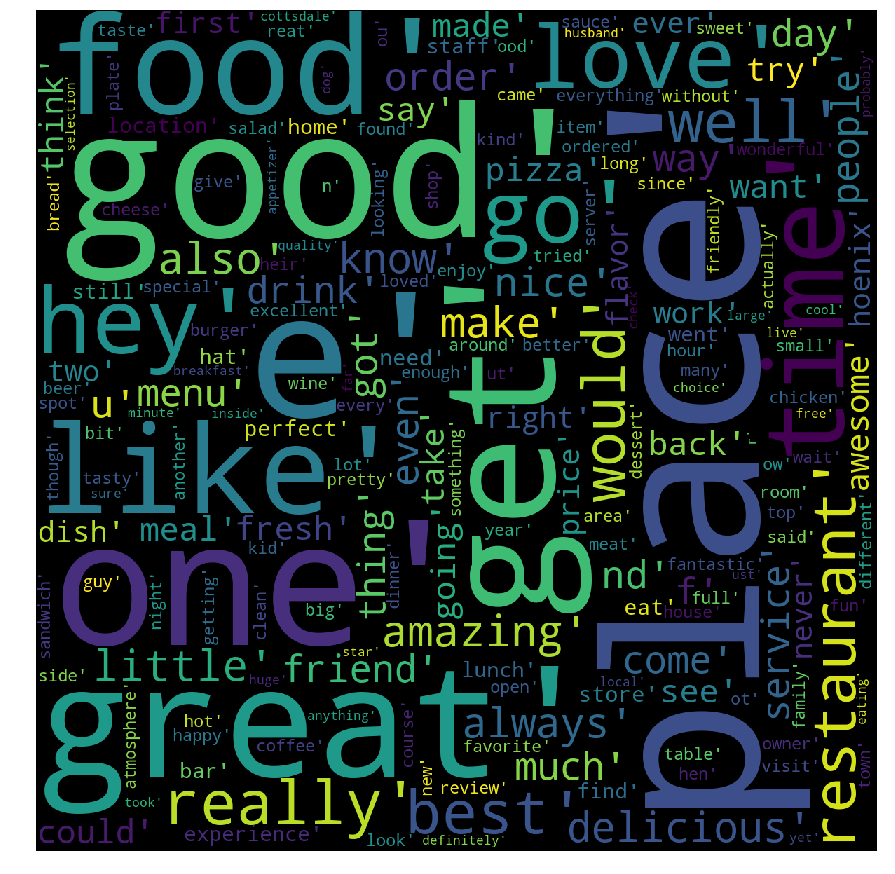

In [330]:
stopwords = set(STOPWORDS) 
bag_words=' '
# only loooking at 1 star

for word in df[df.stars==5].tockem: 
    bag_words= bag_words + str(word) +' '




wordcloud = WordCloud(width = 1200, height = 1200, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(bag_words)


# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### we got a better results with count vecotorizer

# i dont know what is wrong with pipline but make pipline make a much results

In [200]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test= train_test_split(X,y, test_size=0.1)
X_train.shape , X_test.shape, y_train.shape

((9000,), (1000,), (9000, 1))

In [221]:
# naive Bayse

from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer , TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV


Pmodel=make_pipeline(TfidfVectorizer(), MultinomialNB())


Pmodel.fit(X_train,y_train)
Pmodel.score(X_test, y_test)

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.455

In [218]:

Pmodel.score(X_train.tolist(),y_train)

0.5341111111111111

In [225]:
# make prediction for only start 1 and 5
df=yelp[(yelp.stars==1)| (yelp.stars==5)]
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4


In [228]:
X=df.iloc[:,4]
y=df.iloc[:,[3]]


In [229]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test= train_test_split(X,y, test_size=0.1)
X_train.shape , X_test.shape, y_train.shape

((3677,), (409,), (3677, 1))

In [232]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer , TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV


Pmodel=make_pipeline(TfidfVectorizer(analyzer=cleaning ,max_features=50000, min_df=0.05 , ngram_range=(1,3)), MultinomialNB())


Pmodel.fit(X_train,y_train)
Pmodel.score(X_test, y_test)

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8386308068459658

In [233]:
Pmodel.score(X_train.tolist(),y_train)

0.8381833016045689

In [244]:
# naive Bayse

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer , TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

Model = Pipeline([('TF',TfidfVectorizer()), ('NB', MultinomialNB())])


params ={'TF__analyzer':[cleaning],'TF__ngram_range':[(1,1),(1,2),(1,3)],
         'TF__max_features':[50000,20000],'TF__min_df':[0.05]}


GS=GridSearchCV(Model , params, cv=5 , n_jobs=-1 ,verbose=True)
GS.fit(df.text,df.stars)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('TF', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
    ...True,
        vocabulary=None)), ('NB', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'TF__analyzer': [<function cleaning at 0x10aa39510>], 'TF__ngram_range': [(1, 1), (1, 2), (1, 3)], 'TF__min_df': [0.05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)

In [245]:
GS.best_score_

0.8343122858541361

In [246]:
GS.best_params_

{'TF__analyzer': <function __main__.cleaning(x)>,
 'TF__min_df': 0.05,
 'TF__ngram_range': (1, 1)}